In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# NOTE: I am ignoring the deprecation warnings on lmafit because I haven't found a way around them yet
warnings.filterwarnings("ignore")

cwd = os.getcwd()
par = os.path.join(cwd, os.pardir)
sys.path.append(par)

# I made some modules to make importing easier and to have a nice class
# that does all the matrix operations
import matrix_operation
import Dataset

In [2]:
# Just to reload the modules I imported above so I dont need to restart the kernel after making changes
import importlib
importlib.reload(matrix_operation)
importlib.reload(Dataset)

from matrix_operation import mat_opr
from Dataset import dataset

### Import and combine NYT and Big10

In [3]:
# hopefully this works on with your directory structure
# dset.nyt_df : NYT data
# dset.big10_df : Big10 data
# dset.combined and dset.dataframe are the combined version
dset = dataset()

# drop all zero rows and columns
dset.drop_zero_rows()
dset.drop_zero_cols()

# drop all rows where Big10 isn't complete
dset = dset.drop_bad_rows()

### Compare Input with NMF approximation

In [4]:
ranker = dset.rank_approx()
print(ranker)

1


In [5]:
ranker = 3

In [6]:
inp = dset.dataframe

nmfed = dset.missing_nmf(ranker, 1000)

Current Chi2=32856.3184, Previous Chi2=913204.5906, Change=96.4021% @ niters=0
Current Chi2=8927.3989, Previous Chi2=9118.7328, Change=2.0983% @ niters=20
Current Chi2=6738.4510, Previous Chi2=6803.3862, Change=0.9545% @ niters=40
Current Chi2=5653.1962, Previous Chi2=5702.4287, Change=0.8634% @ niters=60
Current Chi2=4717.7876, Previous Chi2=4762.5446, Change=0.9398% @ niters=80
Current Chi2=3868.4986, Previous Chi2=3908.9238, Change=1.0342% @ niters=100
Current Chi2=3102.8913, Previous Chi2=3139.0555, Change=1.1521% @ niters=120
Current Chi2=2448.8026, Previous Chi2=2477.6728, Change=1.1652% @ niters=140
Current Chi2=1980.2369, Previous Chi2=1998.6939, Change=0.9235% @ niters=160
Current Chi2=1699.5185, Previous Chi2=1710.2599, Change=0.6281% @ niters=180
Current Chi2=1531.1878, Previous Chi2=1537.9315, Change=0.4385% @ niters=200
Current Chi2=1420.4429, Previous Chi2=1425.0858, Change=0.3258% @ niters=220
Current Chi2=1340.7196, Previous Chi2=1344.2390, Change=0.2618% @ niters=240
C

In [7]:
with_iso = nmfed.known_iso()

## Graph Results

### Big 10 Schools

<AxesSubplot:title={'center':'Iowa'}>

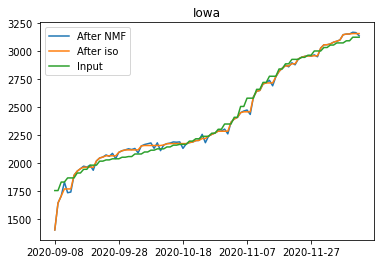

In [8]:
Iowa = pd.concat([inp['Iowa'], nmfed.dataframe['Iowa'], with_iso.dataframe['Iowa']], axis = 1)
Iowa.columns = ['Input', 'After NMF', 'After iso']
Iowa = Iowa.replace(0,np.nan)

Iowa.drop('Input',1).plot(kind = 'line',legend=True, title = 'Iowa')
Iowa['Input'].plot(legend=True)

<AxesSubplot:title={'center':'Michigan State'}>

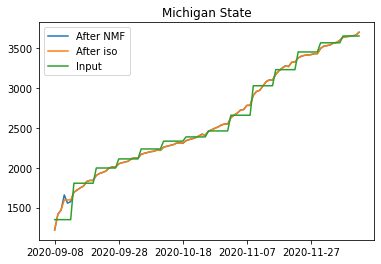

In [9]:
Michigan = pd.concat([inp['Michigan State'], nmfed.dataframe['Michigan State'], with_iso.dataframe['Michigan State']], axis = 1)
Michigan.columns = ['Input', 'After NMF', 'After iso']
Michigan = Michigan.replace(0,np.nan)

Michigan.drop('Input',1).plot(kind = 'line',legend=True, title = 'Michigan State')
Michigan['Input'].plot(legend=True)

<AxesSubplot:title={'center':'Ohio State'}>

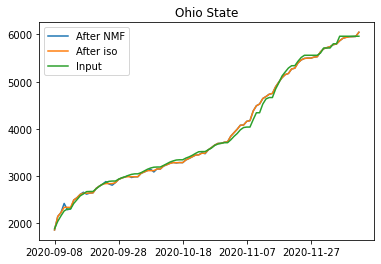

In [10]:
Ohio = pd.concat([inp['Ohio State'], nmfed.dataframe['Ohio State'], with_iso.dataframe['Ohio State']], axis = 1)
Ohio.columns = ['Input', 'After NMF', 'After iso']
Ohio = Ohio.replace(0,np.nan)

Ohio.drop('Input',1).plot(kind = 'line',legend=True, title = 'Ohio State')
Ohio['Input'].plot(legend=True)

### NYT Schools

<AxesSubplot:title={'center':'Boston University'}>

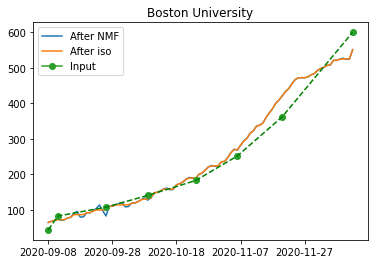

In [11]:
bu = pd.concat([inp['Boston University'], nmfed.dataframe['Boston University'], with_iso.dataframe['Boston University']], axis = 1)
bu.columns = ['Input','After NMF', 'After iso']
bu = bu.replace(0,np.nan)

bu.drop('Input',1).plot(kind = 'line',legend=True, title = 'Boston University')
bu['Input'].plot(marker='o',legend=True)
bu['Input'].interpolate(method='linear').plot(color = 'g', linestyle='--')

<AxesSubplot:title={'center':'University of California, Los Angeles'}>

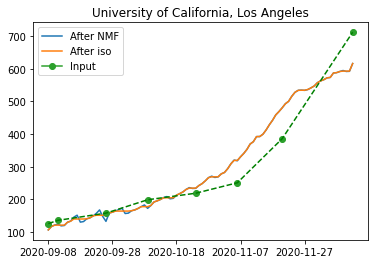

In [12]:
ucla = pd.concat([inp['University of California, Los Angeles'], nmfed.dataframe['University of California, Los Angeles'], with_iso.dataframe['University of California, Los Angeles']], axis = 1)
ucla.columns = ['Input','After NMF', 'After iso']
ucla = ucla.replace(0,np.nan)

ucla.drop('Input',1).plot(kind = 'line',legend=True, title = 'University of California, Los Angeles')
ucla['Input'].plot(marker='o', legend = True)
ucla['Input'].interpolate(method='linear').plot(color = 'g', linestyle='--')

<AxesSubplot:title={'center':'Florida State University'}>

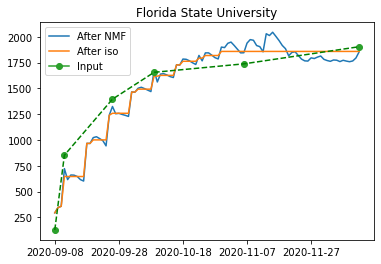

In [13]:
florida = pd.concat([inp['Florida State University'], nmfed.dataframe['Florida State University'], with_iso.dataframe['Florida State University']], axis = 1)
florida.columns = ['Input', 'After NMF', 'After iso']
florida = florida.replace(0,np.nan)

florida.drop('Input',1).plot(kind = 'line',legend=True, title = 'Florida State University')
florida['Input'].plot(marker='o',legend=True)
florida['Input'].interpolate(method='linear').plot(color = 'g', linestyle='--')

### Randomly Hide entries and compute error

In [14]:
tests = np.linspace(0.01,0.3,5)

In [15]:
comp_err, iso_err = dset.hidden_tester(trials=[0.01], method='nmf', ranker=ranker, isotonic=True)

plt.plot([0.01], comp_err, label="lmafit")
plt.plot([0.01], iso_err, label="lmafit + iso regression")
plt.xlabel("percent hidden")
plt.ylabel("Mean absolute error")
plt.title("Error after matrix completion and isotonic regression")
plt.legend()

ValueError: NMF construction failed, likely due to missing data

In [ ]:
print(comp_err)
print(iso_err)